<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [9]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [11]:
#Importation du fichier billets.csv
df_billets = pd.read_csv('C:/Users/mariam.sissoko01/Desktop/DATA ANALYST/PROJET 12/billets.csv', sep=';')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

In [13]:
df_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.3 - Vue d'ensemble des données</h3>
</div>

In [15]:
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [16]:
df_billets .isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [17]:
df_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.4 - Analyse des variables numériques</h3>
</div>

### Les caractéristiques des billets selon qu'ils soient vrais ou faux

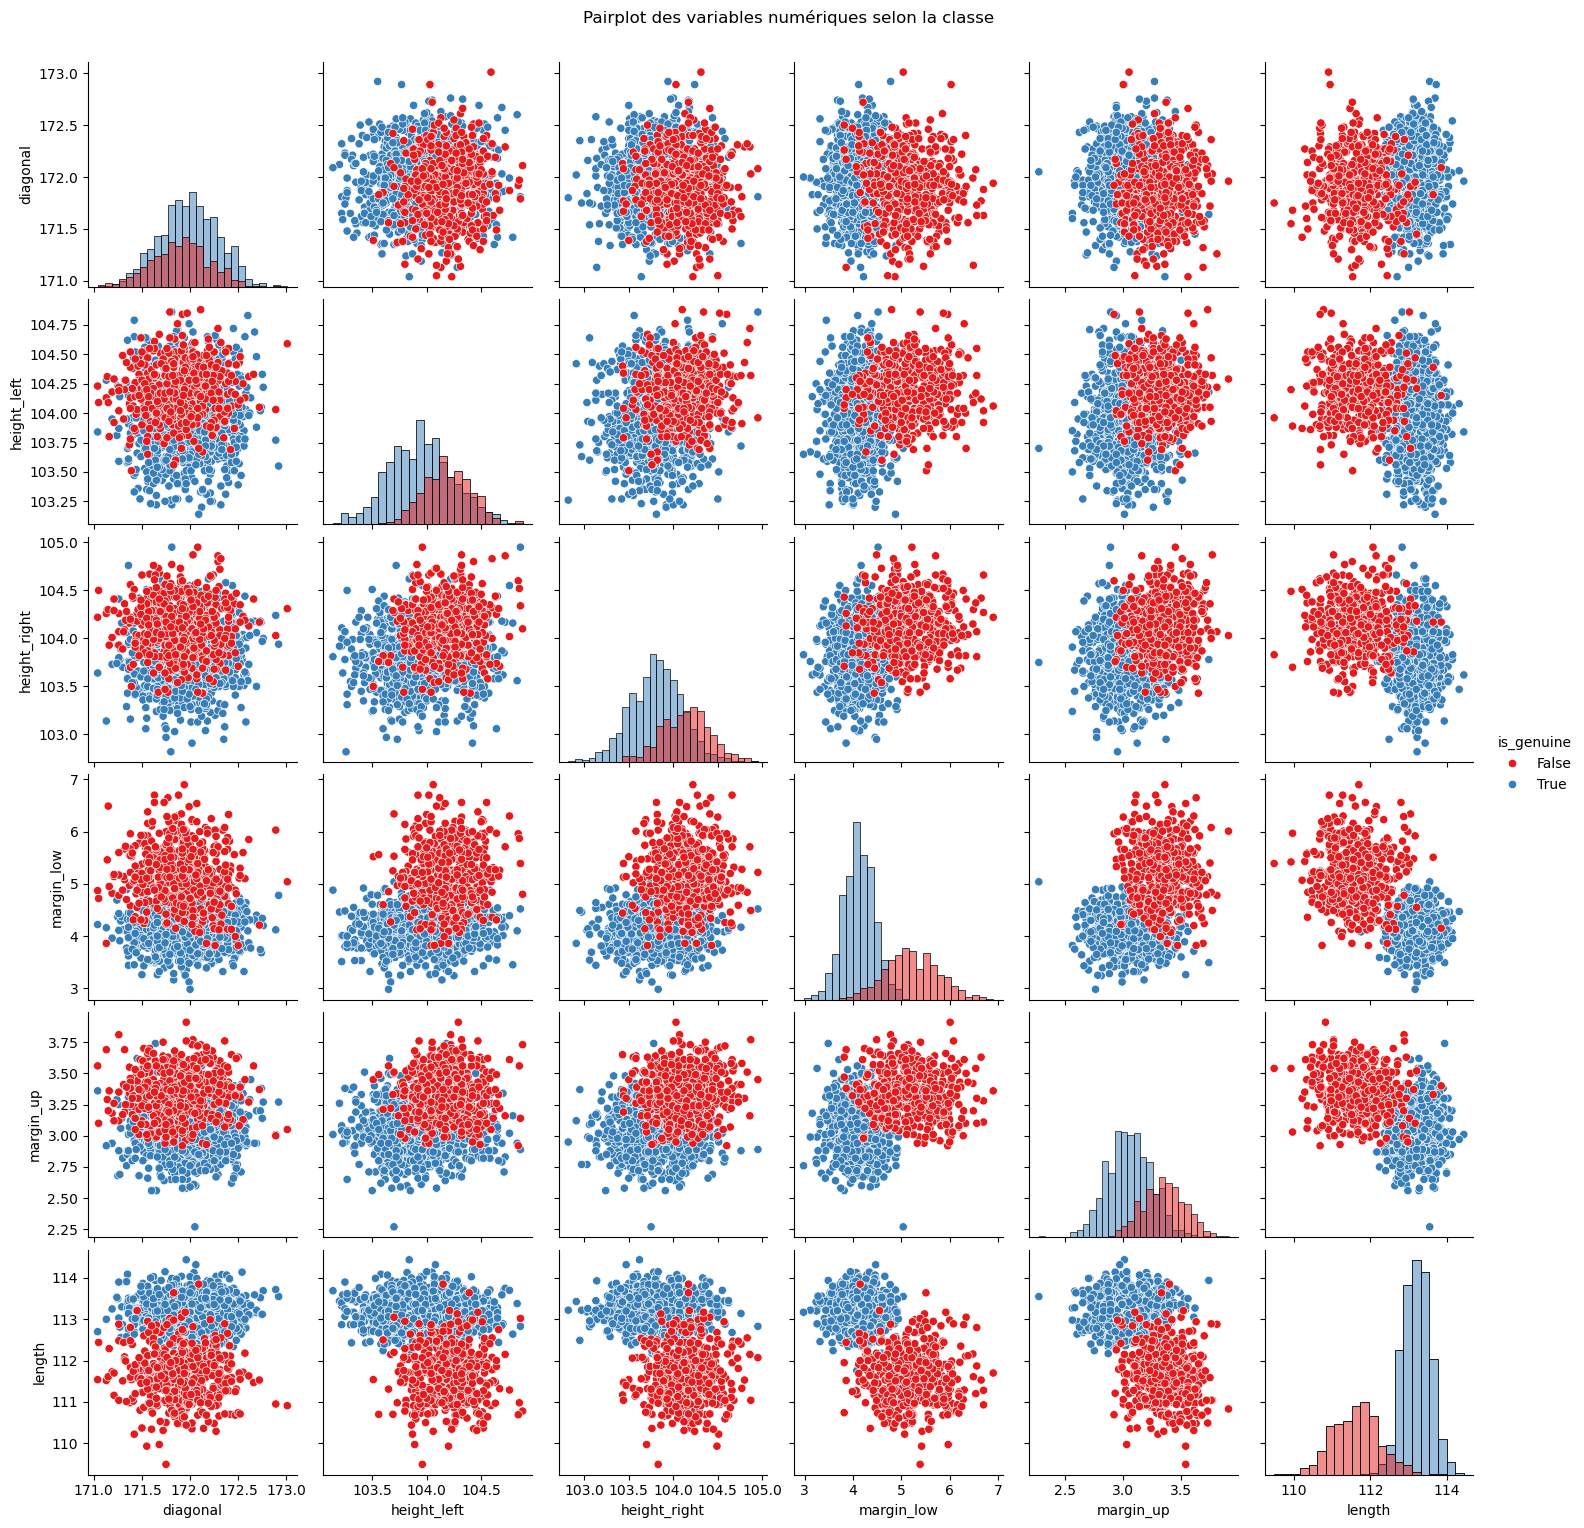

In [20]:
# Sélection des colonnes numériques + la cible
colonnes_numeriques = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length', 'is_genuine']
# Pairplot
sns.pairplot(df_billets[colonnes_numeriques], hue='is_genuine', diag_kind='hist', palette='Set1')
plt.suptitle("Pairplot des variables numériques selon la classe", y=1.02)
plt.show()

In [21]:
df_fbillets=df_billets[df_billets['is_genuine']==False]
df_vbillets=df_billets[df_billets['is_genuine']==True]

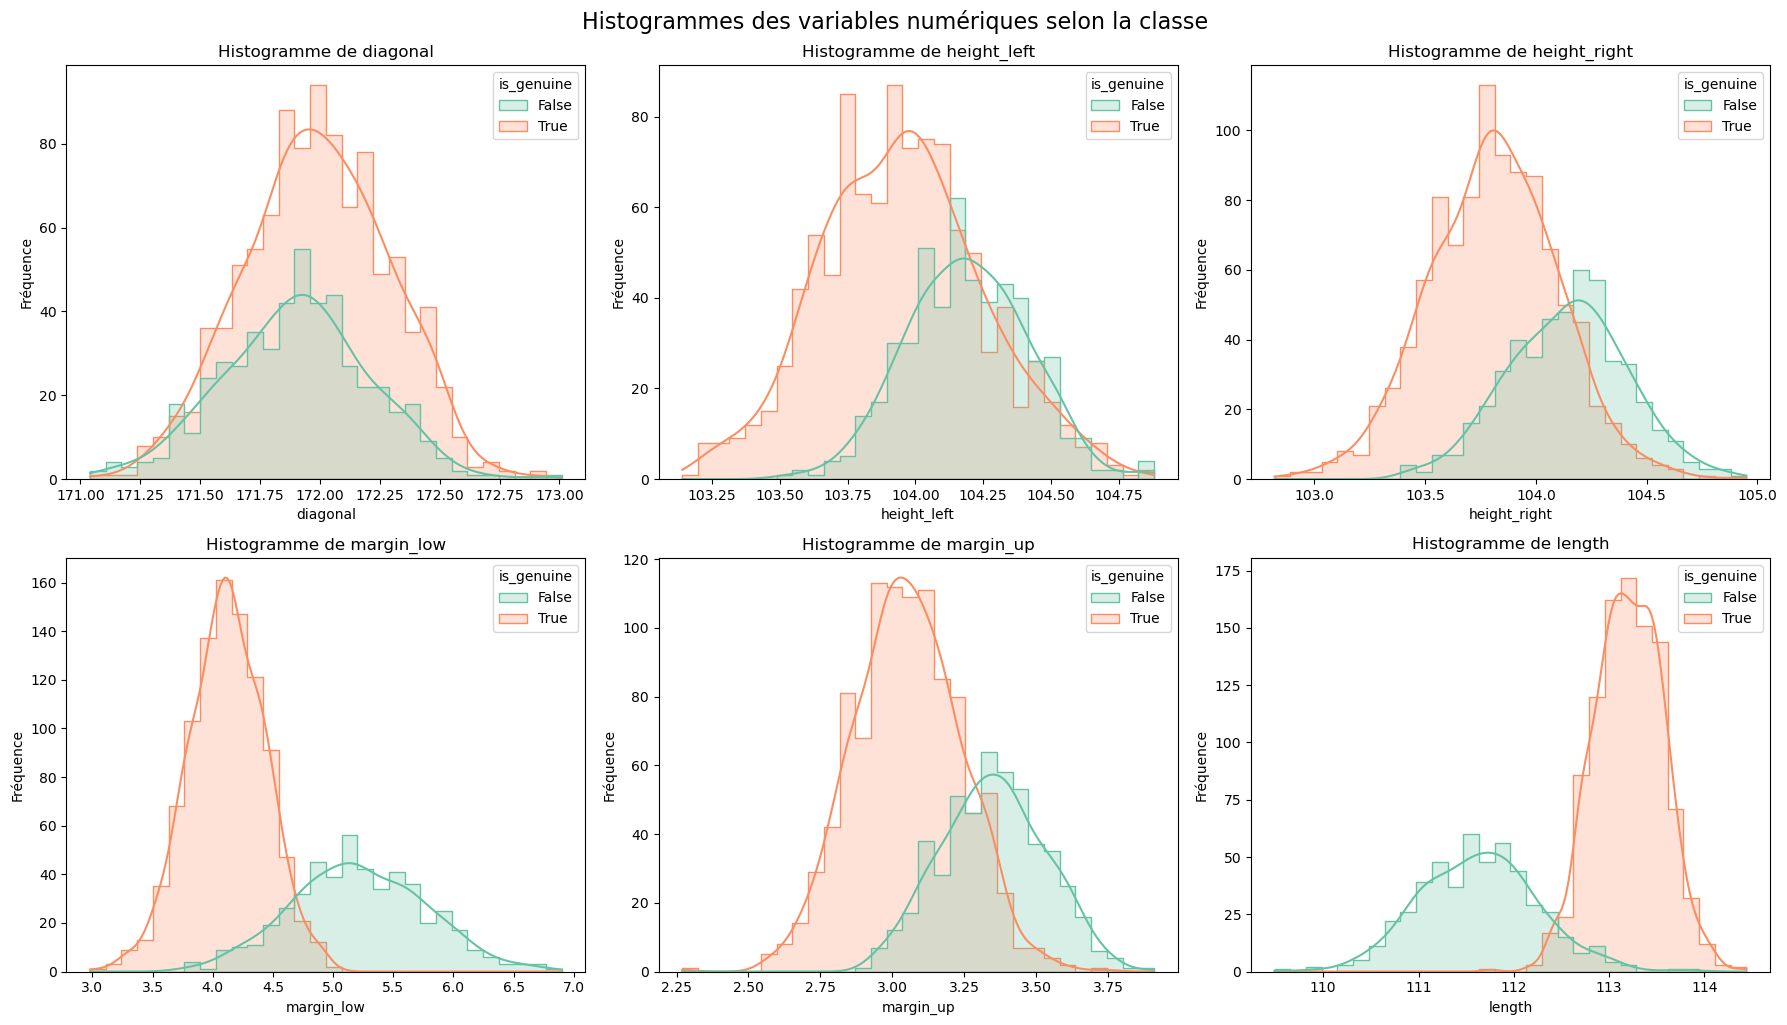

In [22]:
# Colonnes numériques à afficher
colonnes_numeriques = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Taille de la grille (2 lignes × 3 colonnes ici)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Aplatir pour itérer facilement

# Tracer chaque histogramme
for i, col in enumerate(colonnes_numeriques):
    sns.histplot(data=df_billets, x=col, hue='is_genuine', bins=30, kde=True,
                 palette='Set2', element='step', ax=axes[i])
    axes[i].set_title(f'Histogramme de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

# Ajuster les espacements
plt.tight_layout()
plt.suptitle("Histogrammes des variables numériques selon la classe", fontsize=16, y=1.02)
plt.show()

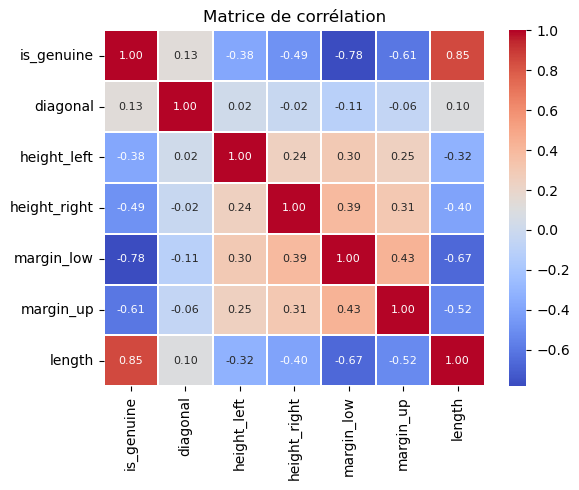

In [23]:
# Calcul de la matrice de corrélation
correlation_matrix = df_billets.corr(numeric_only=True)
# Affichage plus compact
plt.figure(figsize=(6, 5))  # Taille réduite
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.3,
    annot_kws={"size": 8}  # Réduction de la taille des annotations
)
plt.title("Matrice de corrélation", fontsize=12)
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.5 - Regression linéaire sans les valeurs manquantes</h3>
</div>

In [25]:
df_billetssans = df_billets.dropna()

In [26]:
# Modèle de régression linéaire pour prédire margin_low les residus
marge_basse = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', 
                      data=df_billetssans).fit()

# Résumé du modèle
print(marge_basse.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 29 May 2025   Prob (F-statistic):          2.60e-202
Time:                        11:42:04   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

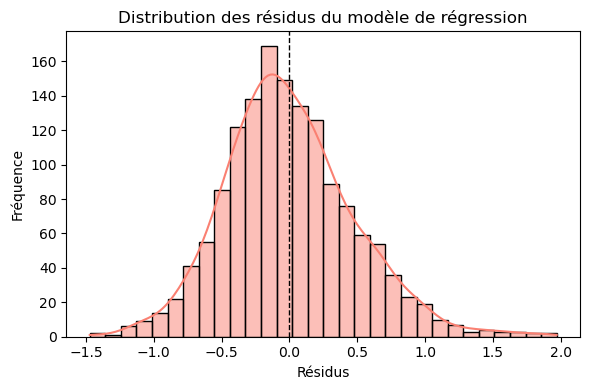

In [33]:
# Histogramme des résidus
plt.figure(figsize=(6, 4))
sns.histplot(marge_basse.resid, bins=30, kde=True, color='salmon')
plt.title("Distribution des résidus du modèle de régression")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

### Colinearité des variables

In [35]:
# Matrice des variables explicatives
variable = marge_basse.model.exog
# Calcul du VIF pour chaque variable, en excluant la constante
vf = [variance_inflation_factor(variable, i) for i in range(1, variable.shape[1])]
# Affichage des résultats des VIF
for i, vif in enumerate(vf):
    # Indentation correcte du bloc à l'intérieur du 'for'
    print(f"Variable {i} - variance_inflation_factor : {vif:.2f}")

Variable 0 - variance_inflation_factor : 1.01
Variable 1 - variance_inflation_factor : 1.14
Variable 2 - variance_inflation_factor : 1.23
Variable 3 - variance_inflation_factor : 1.40
Variable 4 - variance_inflation_factor : 1.58


Les coefficients sont inférieurs à 2 ce qui veut dire qu'il n'y a pas de colinéarité

### Homoscédasticité

In [38]:
# Appliquer le test de Breusch-Pagan
lm_stat, lm_pval, f_stat, f_pval = het_breuschpagan(marge_basse.resid, marge_basse.model.exog)

# Affichage de la p-value
print("P-value du test de Breusch-Pagan :", lm_pval)

P-value du test de Breusch-Pagan : 7.759535216219784e-16


Il existe une homoscédasticité des residus car le p-value>0.05 suite au test de Breusch-Pagan

Statistique de Shapiro-Wilk : 0.9858
P-value : 0.0000
Les résidus ne suivent pas une distribution normale (H0 rejetée).


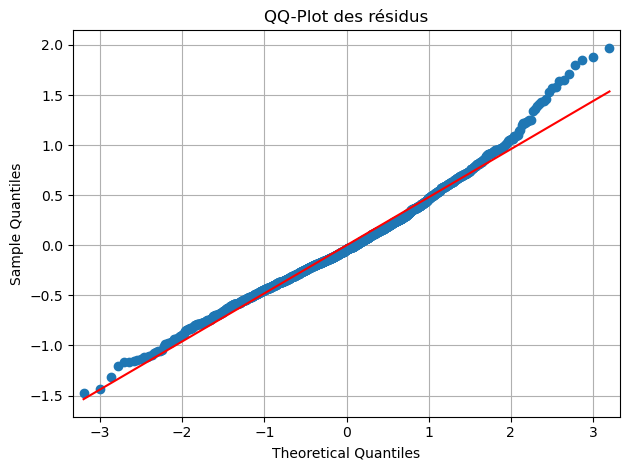

In [40]:
# Test de shapiro sur les residus 
# Extraire les résidus du modèle
residus = marge_basse.resid

# Appliquer le test de Shapiro-Wilk
stat, p_value = shapiro(residus)

# Affichage du résultat
print(f"Statistique de Shapiro-Wilk : {stat:.4f}")
print(f"P-value : {p_value:.4f}")

# Interprétation automatique
if p_value < 0.05:
    print("Les résidus ne suivent pas une distribution normale (H0 rejetée).")
else:
    print("Les résidus suivent une distribution normale (H0 non rejetée).")
#QQ-Plot (Quantile-Quantile plot)
sm.qqplot(residus, line='s')
plt.title("QQ-Plot des résidus")
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.6 - Régression linéaire pour imputer des valeurs manquantes de la variable margin_low</h3></div>

In [42]:
# Nous allons regrouper les valeurs dans un dataframe
df_valeurs_manques=df_billets[df_billets["margin_low"].isnull()]
df_valeurs_manques.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [43]:
df_billets.dropna(inplace = True)
y_train=df_billets['margin_low']
x_train = df_billets.drop(['margin_low','is_genuine'],axis=1)
model_l = LinearRegression()
model_l.fit(x_train,y_train)
x_test =df_valeurs_manques.drop(['margin_low','is_genuine'],axis=1)
y_pred=model_l.predict(x_test)
model_l.score(x_train,y_train)
df_valeurs_manques.loc[df_valeurs_manques.margin_low.isnull(), 'margin_low'] =y_pred

In [44]:
# Fusionner les deux DataFrames
df_merge = pd.concat([df_billets, df_valeurs_manques]).sort_index()
df_merge.info()
df_merge.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [45]:
df_merge.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


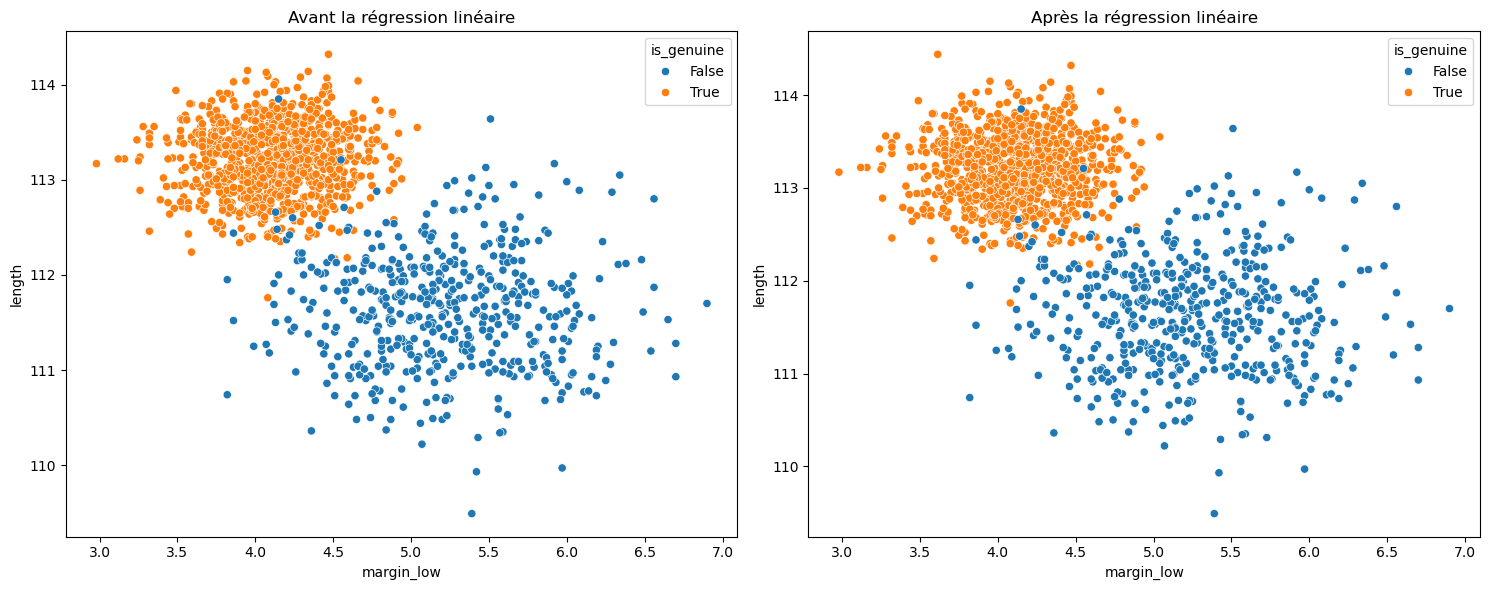

In [46]:
plt.figure(figsize=(15, 6))
# ➤ Graphique avant la régression linéaire (données incomplètes)
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_billets, x='margin_low', y='length', hue='is_genuine')
plt.xlabel('margin_low')
plt.title('Avant la régression linéaire')
# ➤ Graphique après la régression linéaire (données fusionnées après imputation)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_merge, x='margin_low', y='length', hue='is_genuine')
plt.xlabel('margin_low')
plt.title('Après la régression linéaire')

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.6 -Application KMEANS </h3></div>

In [48]:
#Standardisation des données
# 1. Liste des colonnes numériques
colonnes_num = ['diagonal', 'height_right', 'height_left', 'margin_low', 'margin_up', 'length']

# 2. Standardisation
scaler = StandardScaler()
std_scaler = scaler.fit_transform(df_merge[colonnes_num])

# 3. Création d'un DataFrame à partir des données standardisées
df_scaler = pd.DataFrame(std_scaler, columns=colonnes_num)

# 4. Affichage
print(" Les données standardisées :")
df_scaler.head()

 Les données standardisées :


,diagonal,height_right,height_left,margin_low,margin_up,length
0,-0.486540,3.163240,2.774123,0.055390,-1.128325,0.173651
1,-1.633729,-0.799668,-2.236535,-1.081987,-0.696799,0.471666
2,2.397823,-1.291191,1.504756,-0.126591,-0.912562,0.551901
3,-1.961498,0.060498,-0.399294,-1.309463,-0.610494,0.953075
4,-0.748754,-1.414072,0.836669,-0.672532,1.417677,-0.158750


C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Roaming\Pyth

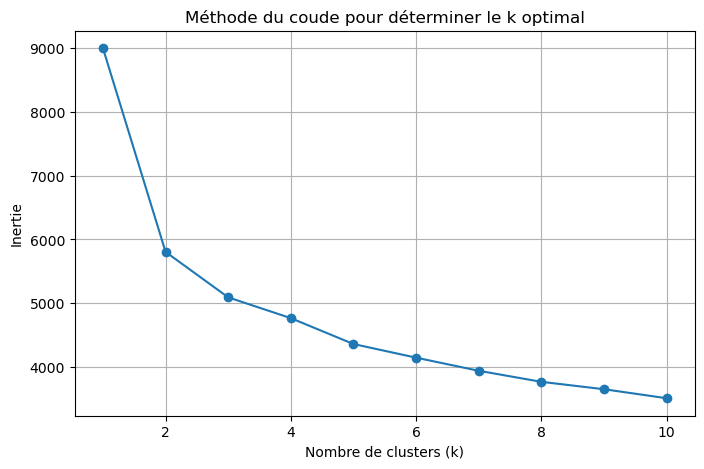

In [49]:
# Méthode du coude
inertias = []
K = range(1, 11)  # nombre de clusters à tester

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaler)
    inertias.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode du coude pour déterminer le k optimal")
plt.grid(True)
plt.show()

In [50]:
n_clust = 2
X = df_scaler
# X = preprocessing.StandardScaler().fit_transform(X)
km = KMeans(n_clusters=n_clust)
km.fit(X)
clusters = km.labels_
df_merge['cluster'] = clusters
df_merge['is_genuine'].replace([True,False],[1,0],inplace =True)
# 6. Affichage
df_merge.head()
print(df_merge['cluster'].value_counts())
df_merge.head()

cluster
0    1003
1     497
Name: count, dtype: int64


C:\Users\mariam.sissoko01\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mariam.sissoko01\AppData\Local\Temp\ipykernel_26184\3116044555.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['is_genuine'].replace([True,False],[1,0],inplace =True)
C:\Users\mariam.sissoko01

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1
1,1,171.46,103.36,103.66,3.77,2.99,113.09,0
2,1,172.69,104.48,103.50,4.40,2.94,113.16,0
3,1,171.36,103.91,103.94,3.62,3.01,113.51,0
4,1,171.73,104.28,103.46,4.04,3.48,112.54,0


### Une matrice de confusion pour évaluer la performance du modèle de classification 

Matrice de confusion :


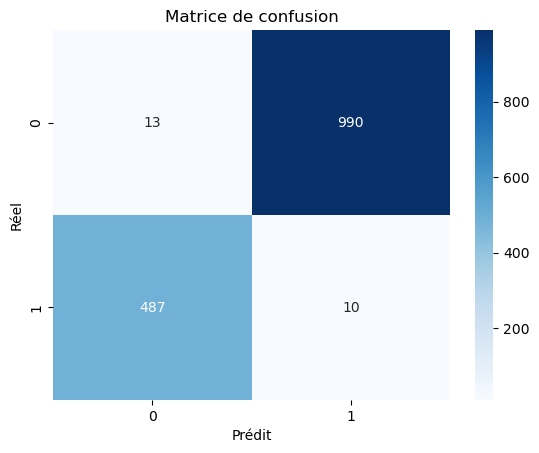


==> Le pourcentage d'accuracy pour le K-Mean 1.53 %


In [52]:
y_actu = df_merge['is_genuine']
y_pred = df_merge['cluster']

# Matrice de confusion
cm = confusion_matrix(y_pred,y_actu)
tn, fp, fn, tp = cm.ravel()  # extraction des 4 valeurs

# Affichage des résultats

print("Matrice de confusion :")

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Calcul du pourcentage d'erreur
accuracy_km = np.round(accuracy_score(y_actu,y_pred)*100,2)
print(f"\n==> Le pourcentage d'accuracy pour le K-Mean {accuracy_km} %")

In [53]:
# 1. Définir les vraies et les prédictions
y_actu = df_merge['is_genuine']
y_pred = df_merge['cluster']

# 2. Matrice de confusion (absolue et %)
cm = confusion_matrix(y_actu, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# 3. Affichage personnalisé ligne par ligne
print(" Détails des prédictions par classe :")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        percent = cm_percent[i, j]
        print(f"Reel: {i}, predit: {j} -> {count} ({percent:.1f}%)")

 Détails des prédictions par classe :
Reel: 0, predit: 0 -> 13 (2.6%)
Reel: 0, predit: 1 -> 487 (97.4%)
Reel: 1, predit: 0 -> 990 (99.0%)
Reel: 1, predit: 1 -> 10 (1.0%)


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.7 -Regression Logistique </h3></div>

=== Évaluation du modèle de régression logistique ===

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Matrice de confusion :


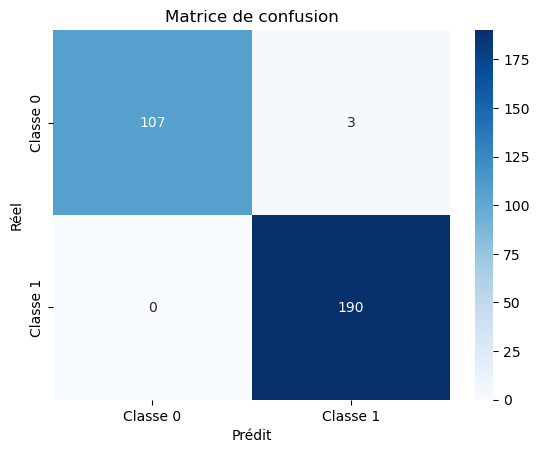


==> Le pourcentage d'accuracy pour la régression logistique : 99.0 %


In [55]:
# Séparation des features et de la cible
X = df_merge.drop(columns=['is_genuine', 'cluster'])
y = df_merge['is_genuine']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Évaluation
print("=== Évaluation du modèle de régression logistique ===\n")
print("Classification Report :")
print(classification_report(y_test, y_pred))  # Ordre correct : y_test (réel), y_pred (prédit)

print("Matrice de confusion :")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Accuracy
accuracy_rl = np.round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"\n==> Le pourcentage d'accuracy pour la régression logistique : {accuracy_rl} %")

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.8 -KNN </h3></div>

=== Évaluation du modèle KNN ===

Classification Report pour KNN :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Matrice de confusion pour KNN :
[[107   3]
 [  0 190]]


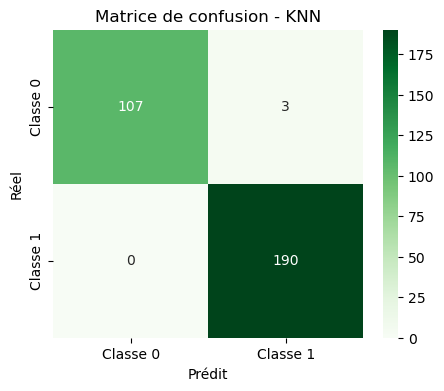


==> Le pourcentage d'accuracy pour le KNN est de 99.0 %


In [59]:
# Entraînement du modèle KNN avec k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prédictions
y_pred = knn.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Évaluation
print("=== Évaluation du modèle KNN ===\n")
print("Classification Report pour KNN :")
print(classification_report(y_test, y_pred))

print("Matrice de confusion pour KNN :")
print(cm)

# Visualisation heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion - KNN')
plt.show()

# Accuracy
accuracy_knn = np.round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"\n==> Le pourcentage d'accuracy pour le KNN est de {accuracy_knn} %")

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.9 -Random Forest </h3></div>

=== Évaluation du modèle Random Forest ===

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Matrice de confusion :
[[107   3]
 [  0 190]]


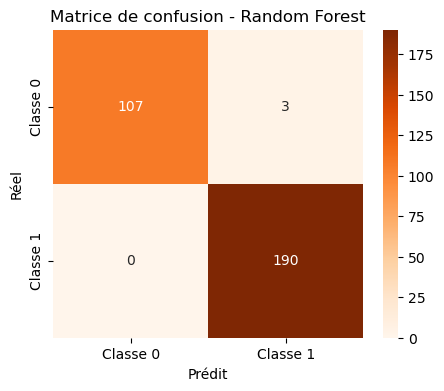


==> Le pourcentage d'accuracy pour le Random Forest est de 99.0 %


In [63]:
# Entraînement du modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Évaluation
print("=== Évaluation du modèle Random Forest ===\n")
print("Classification Report :")
print(classification_report(y_test, y_pred))  #  Corrigé ici : ordre correct (y_test, y_pred)

print("Matrice de confusion :")
print(cm)

# Visualisation de la matrice
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion - Random Forest')
plt.show()

# Accuracy
accuracy_rf = np.round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"\n==> Le pourcentage d'accuracy pour le Random Forest est de {accuracy_rf} %")

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> 2 -Application Fonctionnelle du modele  </h3></div>

In [75]:
import joblib
joblib.dump(model,'Mon_model.pkl')

['Mon_model.pkl']

In [76]:
Mon_model=joblib.load('Mon_model.pkl')

In [79]:
prediction = Mon_model.predict(X_test)
prediction

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1], d

In [82]:
features = X_test.columns.tolist()
features

['diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [86]:
df_prod = pd.read_csv('billets_production.csv')
df_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [88]:
def prediction_final(data):
    features=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
    Mon_model=joblib.load('Mon_model.pkl')
    data['prediction']=Mon_model.predict(data[features])
    return data


In [239]:
prediction_final(df_prod)

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,1
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,1
